# Import libraries and datasets

In [1]:
# Import libraries
import tensorflow as tf 
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# Import datasets 
test_path = "C:\\Users\\daeni\\Desktop\\LOVE\\Academics\\JeepNi\\ML Model for Sale Prediction\\Dataset\\test.csv"
train_path = "C:\\Users\\daeni\\Desktop\\LOVE\\Academics\\JeepNi\\ML Model for Sale Prediction\\Dataset\\train.csv"

In [3]:
# Convert csv to dataframe 
df_test = pd.read_csv(test_path)
df_train = pd.read_csv(train_path)

# Test Dataset Attributes

In [4]:
df_test.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0


In [5]:
df_test.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [6]:
df_test.shape

(89861, 8)

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89861 entries, 0 to 89860
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_duration       89861 non-null  float64
 1   distance_traveled   89861 non-null  float64
 2   num_of_passengers   89861 non-null  float64
 3   fare                89861 non-null  int64  
 4   tip                 89861 non-null  int64  
 5   miscellaneous_fees  89861 non-null  float64
 6   total_fare          89861 non-null  int64  
 7   surge_applied       89861 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 5.5 MB


In [8]:
df_test.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,89861.000000,89861.000000,89861.000000,89861.0,89861.000000,89861.000000,89861.0,89861.000000
mean,1148.178164,7.263529,1.286732,0.0,13.031048,15.190636,0.0,0.282280
std,4611.480867,554.965869,0.920910,0.0,18.692751,12.677904,0.0,0.450112
min,0.000000,0.020000,0.000000,0.0,0.000000,-0.500000,0.0,0.000000
25%,446.000000,1.950000,1.000000,0.0,0.000000,6.000000,0.0,0.000000
50%,705.000000,3.200000,1.000000,0.0,9.000000,9.750000,0.0,0.000000
75%,1094.000000,5.730000,1.000000,0.0,20.000000,26.450000,0.0,1.000000
max,86395.000000,145517.600000,9.000000,0.0,719.000000,431.500000,0.0,1.000000


# Train Dataset Attributes

In [9]:
df_train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [10]:
df_train.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [11]:
df_train.shape

(209673, 8)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [13]:
df_train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


# Data Wrangling

In [14]:
df = pd.concat([df_test, df_train])

In [15]:
columns = ['trip_duration', 'distance_traveled', 'total_fare']
df = df[columns]

In [16]:
df.head()

,trip_duration,distance_traveled,total_fare
0,1076.0,4.18,0.0
1,429.0,1.48,0.0
2,856.0,4.15,0.0
3,622.0,3.22,0.0
4,507.0,3.98,0.0


In [17]:
df.dtypes

trip_duration        float64
distance_traveled    float64
total_fare           float64
dtype: object

In [18]:
df.shape

(299534, 3)

In [19]:
df.describe()

,trip_duration,distance_traveled,total_fare
count,299534.000000,299534.000000,299534.000000
mean,1165.680417,5.717167,89.453417
std,4727.006306,321.516385,101.301805
min,0.000000,0.020000,0.000000
25%,446.000000,1.950000,0.000000
50%,706.000000,3.200000,74.700000
75%,1097.000000,5.730000,126.000000
max,86395.000000,145517.600000,4472.250000


## Removing Null Values

In [21]:
print(f"Null Count\n{df.isnull().sum()}\n\nNA Count\n{df.isna().sum()}")

Null Count
trip_duration        0
distance_traveled    0
total_fare           0
dtype: int64

NA Count
trip_duration        0
distance_traveled    0
total_fare           0
dtype: int64


In [22]:
print(f"0 COUNT\nTrip Duration: {(df['trip_duration']==0).sum()}\nDistance Traveled: {(df['distance_traveled']==0).sum()}\nTotal Fare: {(df['total_fare']==0).sum()}")

0 COUNT
Trip Duration: 45
Distance Traveled: 0
Total Fare: 89990


In [23]:
# Removes values with 0s, distance travelled > 1000 miles, trip duration > 10 hours (36,000s) and distance traveled < 10 miles
# These data points are those that would confound the model
# It was also found in a study that the average working hours of a Jeepney driver is 10 hours

for col in columns:
    df = df[df[col] > 0]
df = df[df['distance_traveled'] < 1000]
df = df[~((df['trip_duration'] > 36000) & (df['distance_traveled'] < 10))]

In [24]:
df.shape # From (299534, 3)

(208915, 3)

In [25]:
print(f"0 COUNT\nTrip Duration: {(df['trip_duration']==0).sum()}\nDistance Traveled: {(df['distance_traveled']==0).sum()}\nTotal Fare: {(df['total_fare']==0).sum()}")

0 COUNT
Trip Duration: 0
Distance Traveled: 0
Total Fare: 0


In [111]:
df.to_csv("taxi_fare_combined.csv")

# Exploratory Data Analysis

## Using Regression Plots

(0.0, 4168.18125)

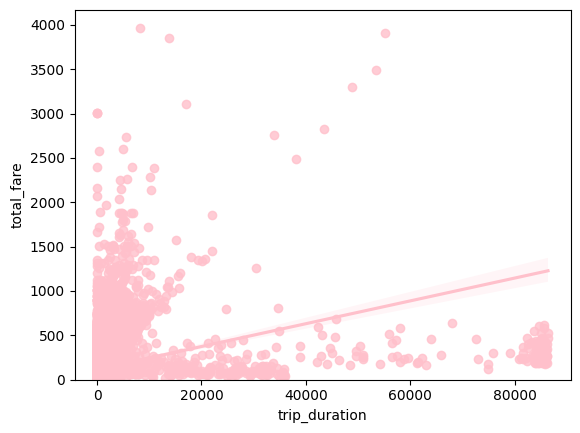

In [26]:
# Trip duration as a potential predictor of total fare 
sns.regplot(x="trip_duration", y="total_fare", data=df, color="pink")
plt.ylim(0,)

(0.0, 5593.940156398917)

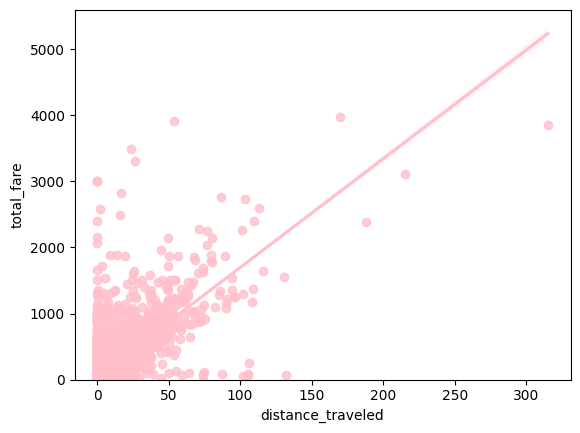

In [27]:
# Distance traveled as potential predictor of total fare
sns.regplot(x="distance_traveled", y="total_fare", data=df, color="pink")
plt.ylim(0,)

## Using Residual Plots

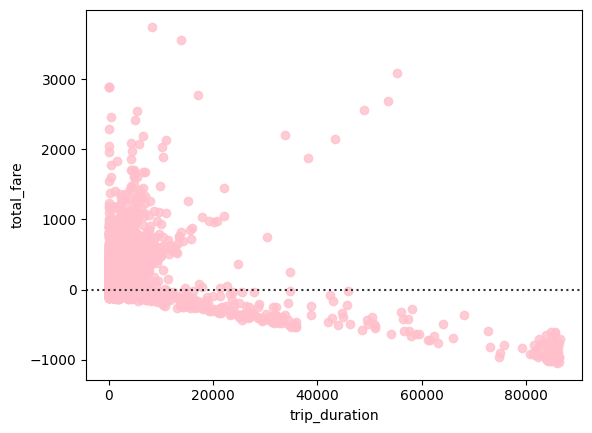

In [28]:
# Between trip duration and total fare
sns.residplot(x=df['trip_duration'], y=df['total_fare'], color='pink')
# plt.axis([7000, 80000, -1000, 3000])
plt.show()

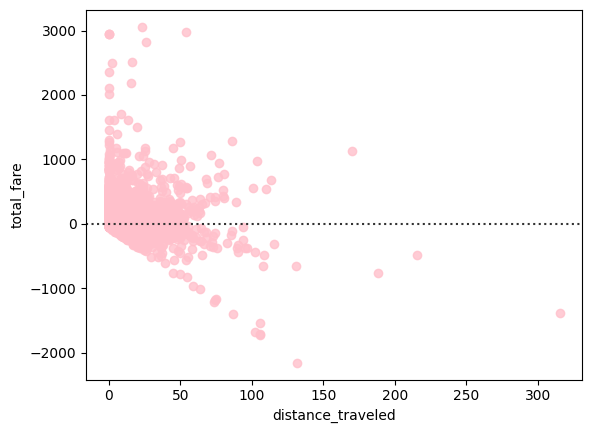

In [29]:
# Between distance traveled and total dare
sns.residplot(x=df['distance_traveled'], y=df['total_fare'], color='pink')
# plt.axis([0, 100, -1000, 3000])
plt.show()

**Both plots show increasing variation as the x values increase. Therefore, the linear model is better fitted for smaller values and will not perform that well for larger values.**

# Multiple Linear Regression Model Building

In [30]:
# Import library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [46]:
lm = LinearRegression()
lm

LinearRegression()

In [47]:
# Predictor and target values 
x = df[['trip_duration', 'distance_traveled']]
y = df['total_fare']

In [48]:
lm.fit(x, y)

LinearRegression()

In [49]:
b0 = lm.intercept_

In [50]:
b1, b2 = lm.coef_

In [51]:
print(f"b0: {b0}\nb1: {b1}\nb2: {b2}")

b0: 48.55139259219837
b1: 0.0022227833165641944
b2: 16.162693719884448


## Linear Function
$$
y = b_0 + b_1x_1 + b_2x_2
$$

where: <br> 
$y$ = total fare <br>
$b_0$ = slope intercept <br>
$b_1$ = coefficient for trip duration <br>
$b_2$ = coefficient for distance traveled <br>

## Model Evaluation

### Via Visualization

In [52]:
y_hat = lm.predict(x)

C:\Users\daeni\AppData\Local\Temp\ipykernel_21980\1257596388.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['total_fare'], hist=False, color="pink", label="Actual Value")
C:\Users\daeni\AppData\Local\Temp\ipykernel_21980\1257596388.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

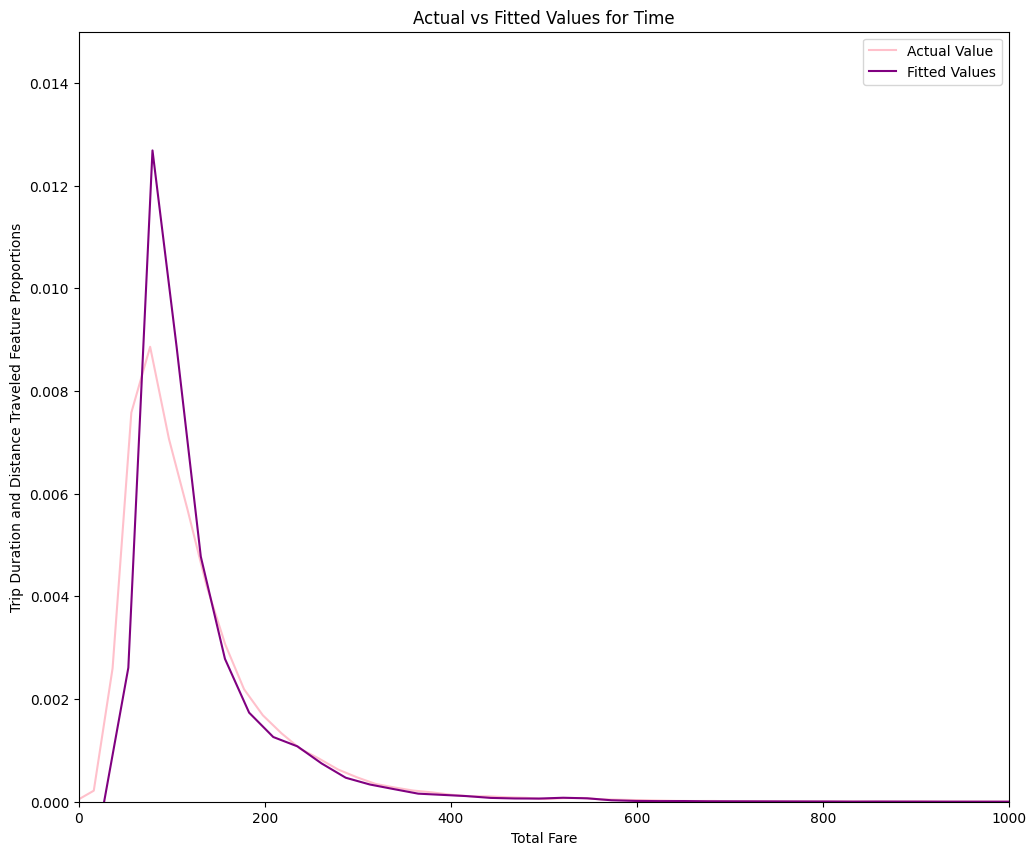

In [53]:
plt.figure(figsize=(12, 10))

ax1 = sns.distplot(df['total_fare'], hist=False, color="pink", label="Actual Value")
sns.distplot(y_hat, hist=False, color="purple", label="Fitted Values" , ax=ax1)

ax1.legend()

plt.title('Actual vs Fitted Values for Time')
plt.xlabel('Total Fare')
plt.ylabel('Trip Duration and Distance Traveled Feature Proportions')

# plt.axis([4500, 5000, 0, 0.000025])
plt.axis([0, 1000, 0, 0.015])
plt.show()

### Via Statistical Measures

In [54]:
df.corr()

,trip_duration,distance_traveled,total_fare
trip_duration,1.000000,0.297923,0.299878
distance_traveled,0.297923,1.000000,0.848074
total_fare,0.299878,0.848074,1.000000


In [55]:
# Calculate Pearson correlation coefficient and p-value of trip duration and total fare
pearson_coef, p_value = stats.pearsonr(df['trip_duration'], df['total_fare'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value)  

The Pearson Correlation Coefficient is 0.2998780113815882  with a P-value of 0.0


<b>Since the p-value is $<$ 0.001, the correlation between trip_duration and total_fare is statistically significant, although the linear relationship isn't extremely strong (~0.300).</b>

In [56]:
# Calculate Pearson correlation coefficient and p-value of distance traveled and total fare
pearson_coef, p_value = stats.pearsonr(df['distance_traveled'], df['total_fare'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value)  

The Pearson Correlation Coefficient is 0.848073965769845  with a P-value of 0.0


<b>Since the p-value is $<$ 0.001, the correlation between trip_duration and total_fare is statistically significant. The linear relationship between variables is extremely strong (~0.848).</b>

In [57]:
# Calculate R-Squared
lm.score(x, y)

0.7216760387236423

In [58]:
# Adjusted R-squared
1 - (1-lm.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

0.7216733742145545

In [59]:
# MSE
y_hat = lm.predict(x)
mse = mean_squared_error(df['total_fare'], y_hat)
mse

2675.6269932158443

**The mean-squared error is too big. Needs to be lower when training model for later.**

In [60]:
# adds the intercept since it is not built in the sm library
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

# Get summary of the model results
summary = model.summary()

# Print the p-values for the coefficients (look for 'P>|t|' column)
print(summary)

                            OLS Regression Results                            
Dep. Variable:             total_fare   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 2.708e+05
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:25:47   Log-Likelihood:            -1.1208e+06
No. Observations:              208915   AIC:                         2.242e+06
Df Residuals:                  208912   BIC:                         2.242e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                48.5514      0.15

# Linear Regression Model

In [31]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [32]:
# Predictor and target values 
x = df[['distance_traveled']]
y = df['total_fare']

In [33]:
lm1.fit(x, y)

LinearRegression()

In [34]:
lm1_b0 = lm1.intercept_

In [35]:
lm1_b1 = lm1.coef_

In [36]:
print(f"b0: {lm1_b0}\nb1: {lm1_b1}")

b0: 49.23630771122558
b1: [16.46235214]


## Linear Function
$$
y = b_0 + b_1x_1 
$$

where: <br> 
$y$ = total fare <br>
$b_0$ = slope intercept <br>
$b_1$ = coefficient for distance traveled <br>


## Model Evaluation

### Via Visualization

In [37]:
y_hat1 = lm1.predict(x)

C:\Users\daeni\AppData\Local\Temp\ipykernel_21980\3538675309.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['total_fare'], hist=False, color="pink", label="Actual Value")
C:\Users\daeni\AppData\Local\Temp\ipykernel_21980\3538675309.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

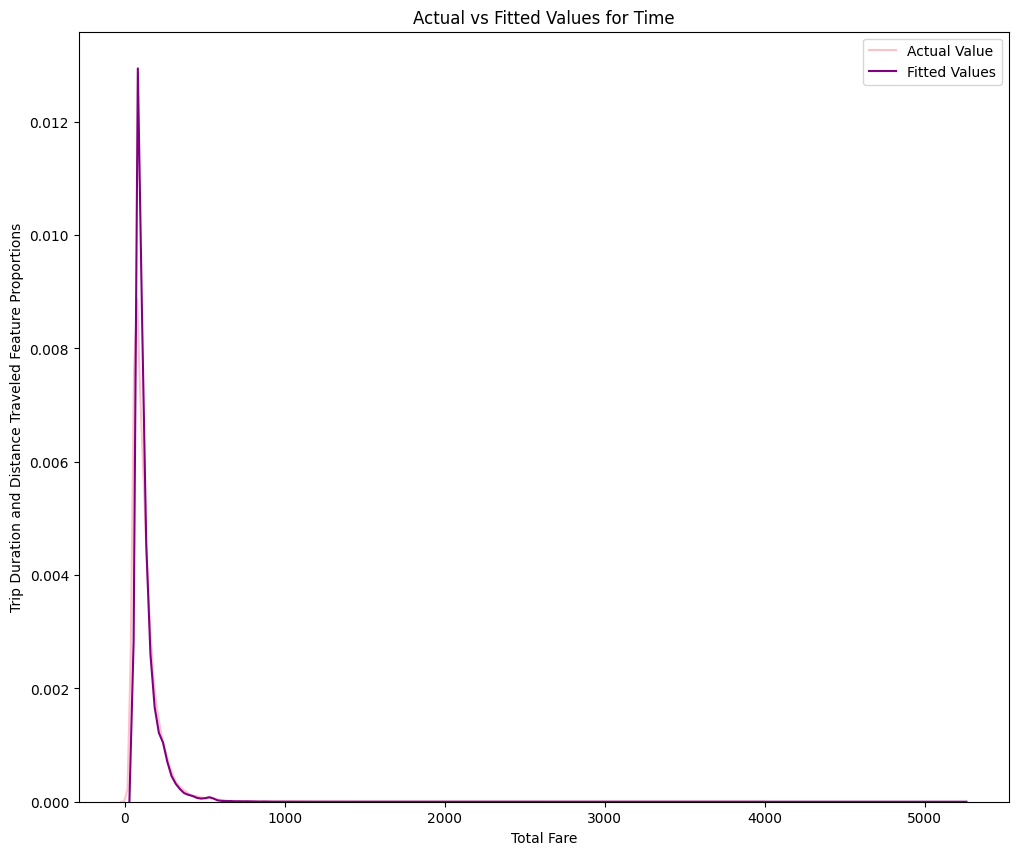

In [38]:
plt.figure(figsize=(12, 10))

ax1 = sns.distplot(df['total_fare'], hist=False, color="pink", label="Actual Value")
sns.distplot(y_hat1, hist=False, color="purple", label="Fitted Values" , ax=ax1)

ax1.legend()

plt.title('Actual vs Fitted Values for Time')
plt.xlabel('Total Fare')
plt.ylabel('Trip Duration and Distance Traveled Feature Proportions')

# plt.axis([4500, 5000, 0, 0.000025])
# plt.axis([0, 1000, 0, 0.015])
plt.show()

### Via Statistical Measures

In [42]:
# Calculate Pearson correlation coefficient and p-value of distance traveled and total fare
pearson_coef, p_value = stats.pearsonr(df['distance_traveled'], df['total_fare'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of", p_value)  

The Pearson Correlation Coefficient is 0.848073965769845  with a P-value of 0.0


In [39]:
# Calculate R-Squared
lm1.score(x, y)

0.7192294514166069

In [41]:
# Adjusted R-squared
1 - (1-lm1.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

0.7192281074574058

In [43]:
# MSE
y_hat = lm1.predict(x)
mse = mean_squared_error(df['total_fare'], y_hat)
mse

2699.146905083811

In [45]:
# adds the intercept since it is not built in the sm library
X = sm.add_constant(x)
model1 = sm.OLS(y, X).fit()

# Get summary of the model results
summary = model1.summary()

# Print the p-values for the coefficients (look for 'P>|t|' column)
print(summary)

                            OLS Regression Results                            
Dep. Variable:             total_fare   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                 5.352e+05
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:25:24   Log-Likelihood:            -1.1217e+06
No. Observations:              208915   AIC:                         2.243e+06
Df Residuals:                  208913   BIC:                         2.243e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.2363      0.15

# Polynomial Regression Model

In [100]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    # plt.title('Polynomial Fit with Matplotlib for Total Fare ~ Distance Traveled')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Total Fare')
    
    plt.axis([0, 60, 0, 3000])
    plt.show()
    plt.close()

## For Distance Traveled

In [101]:
x = df['distance_traveled']
y = df['total_fare']

In [102]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3           2
7.144e-05 x - 0.03859 x + 17.66 x + 45.27


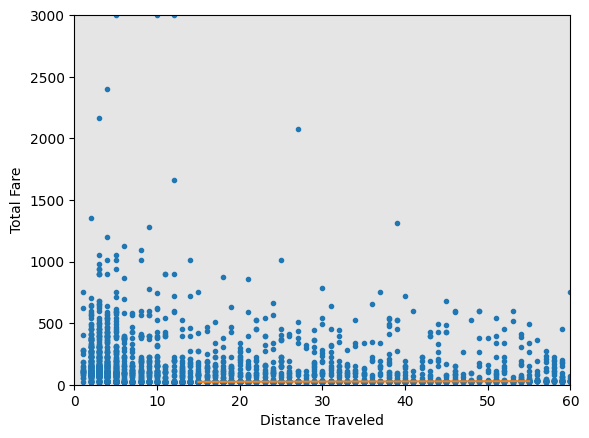

In [107]:
PlotPolly(p, x, y, 'Distance Traveled')

## For Trip Duration

In [108]:
x = df['trip_duration']
y = df['total_fare']

In [109]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 6)
p = np.poly1d(f)
print(p)

           6             5            4             3             2
2.745e-25 x - 4.335e-20 x + 7.73e-16 x + 1.664e-10 x - 8.965e-06 x + 0.1332 x + 21.38


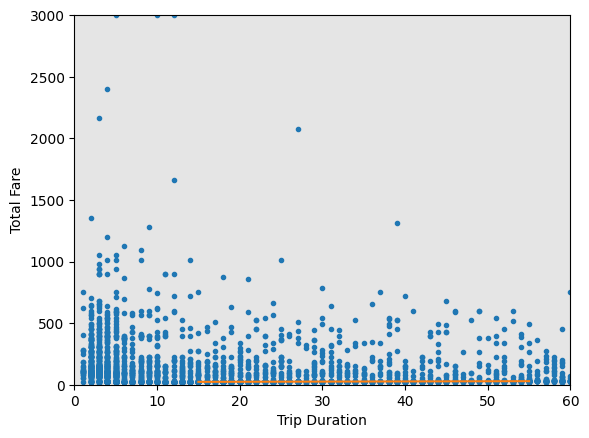

In [110]:
PlotPolly(p, x, y, 'Trip Duration')

**Linear Regression and Multiple Linear Regression Models work best for this dataset. From the Polynomial Regression, it can be seen that there is no curvy relationship between datapoints and is stuck in the same linear function.**